## Bias Variance Tradeoff

# 1. Introduction

It’s important to understand prediction errors (bias and variance) wh. There is a tradeoff between a model’s ability to minimize bias and variance. Gaining a proper understanding of these errors would help us not only to build accurate models but also to avoid the mistake of overfitting and underfitting. If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it's going to have high variance and low bias.


# 2. Understanding Bias
### What is **Bias**?
> Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. - *Seema Singh*

### Bias Definition in Statistics
In statistics, bias is a term which defines the tendency of the measurement process. It means that it evaluates the over or underestimation of the value of the population parameter. Let us consider an example, in case you have the rule to evaluate the mean of the population. Hopefully, you might have found an estimation using the rule, which is the true reflection of the population. Now, by using the biased estimator, it is easy to find the difference between the true value and the statistically expected value of the population parameter. 

### Why it is so important in Data Science?
Due to society's culture and history, historical data might be discriminatory against certain minority groups. Cognitive biases are systematic errors in thinking, usually inherited by cultural and personal experiences, that lead to distortions of perceptions when making decisions. And while data might seem objective, data is collected and analyzed by humans, and thus can be biased. Because of this, it's highly important to check assumptions over the data to avoid future algorithmic bias.

##### Sometimes it can be helpful too!
***The idea of having bias was about model giving importance to some of the features in order to generalize better for the larger dataset with various other attributes. Bias in ML does help us generalize better and make our model less sensitive to some single data point.***

*Information : Wikipedia, bmc.com, Investopedia, towardsdatascience.com*



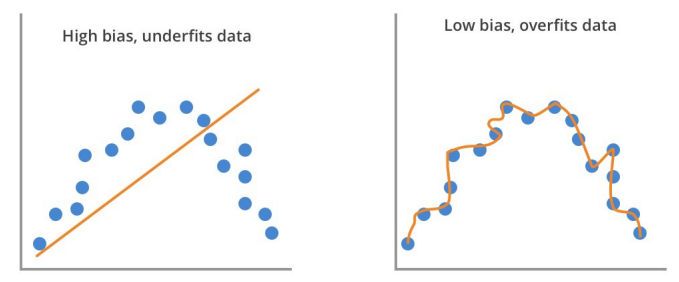

# 3. Understanding Variance
### What is "Variance"

Variance is a measurement of the spread between numbers in a data set. In probability theory and statistics, variance is the expectation of the squared deviation of a random variable from its population mean or sample mean. Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.


### Variance in terms of DS-ML
> Variance is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data. - *Seema Singh*

Also, variance refers to the changes in the model when using different portions of the training data set. Simply stated, variance is the variability in the model prediction—how much the ML function can adjust depending on the given data set.


## Measuring Variance
In statistics, variance measures variability from the average or mean. It is calculated by taking the differences between each number in the data set and the mean, then squaring the differences to make them positive, and finally dividing the sum of the squares by the number of values in the data set. [Learn More](https://en.wikipedia.org/wiki/Variance)

Bias and variance are used in supervised machine learning, in which an algorithm learns from training data or a sample data set of known quantities. The correct balance of bias and variance is vital to building machine-learning algorithms that create accurate results from their models.
*Information : Wikipedia, bmc.com, Investopedia, towardsdatascience.com*


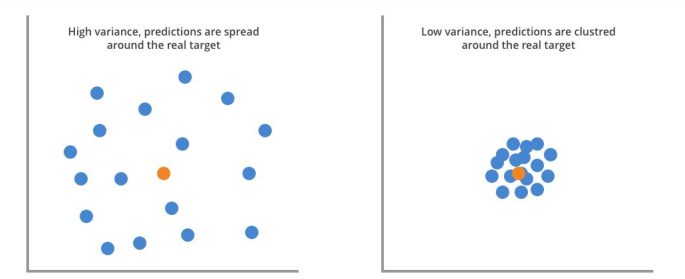

# 4. Understanding Irreducible error

This error is out of the control of the machine learning engineer who is building the model. It’s an error caused by noise in the data,
random variations that don’t represent a real pattern in the data, or the influence of variables that are not yet captured as features.
One way to reduce this type of error is to identify the variables that have impact on the problem we’re modeling and turn them into
features.

# 5. Mathematical Explanation

Let the variable we are trying to predict as Y and other covariates as X. We assume there is a relationship between the two such that

Y=f(X) + e

Where e is the error term and it’s normally distributed with a mean of 0.

We will make a model f^(X) of f(X) using linear regression or any other modeling technique.

So the expected squared error at a point x is

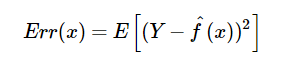

The Err(x) can be further decomposed as

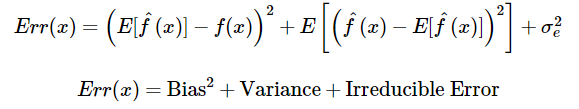

Err(x) is the sum of Bias², variance and the irreducible error.

Irreducible error is the error that can’t be reduced by creating good models. It is a measure of the amount of noise in our data. Here it is important to understand that no matter how good we make our model, our data will have certain amount of noise or irreducible error that can not be removed.

*credit -*[*Seema Singh*](https://medium.com/@seema.singh)

# 6. Bias and variance using bulls-eye diagram

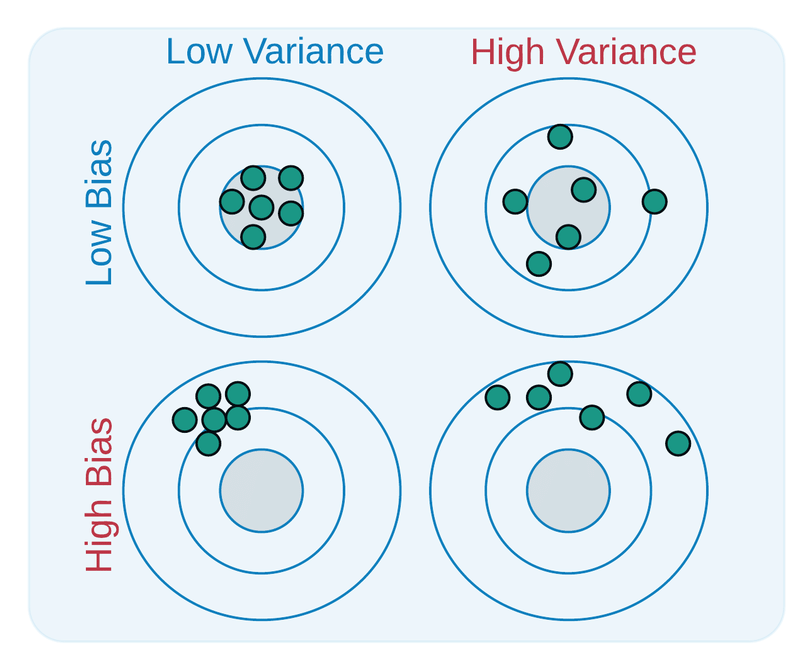

In the above diagram, center of the target is a model that perfectly predicts correct values. As we move away from the bulls-eye our predictions become get worse and worse. We can repeat our process of model building to get separate hits on the target.

### underfitting
**In supervised learning, underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance. It happens when we have very less amount of data to build an accurate model or when we try to build a linear model with a nonlinear data. Also, these kind of models are very simple to capture the complex patterns in data like Linear and logistic regression.**

### overfitting
**In supervised learning, overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance. These models are very complex like Decision trees which are prone to overfitting.**

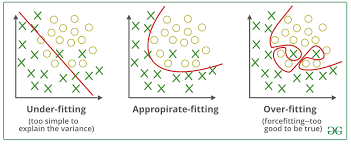

*credit - GeekforGeeks*

## Why Bias Variance Tradeoff?

If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias. So we need to find the right/good balance without overfitting and underfitting the data.

This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.


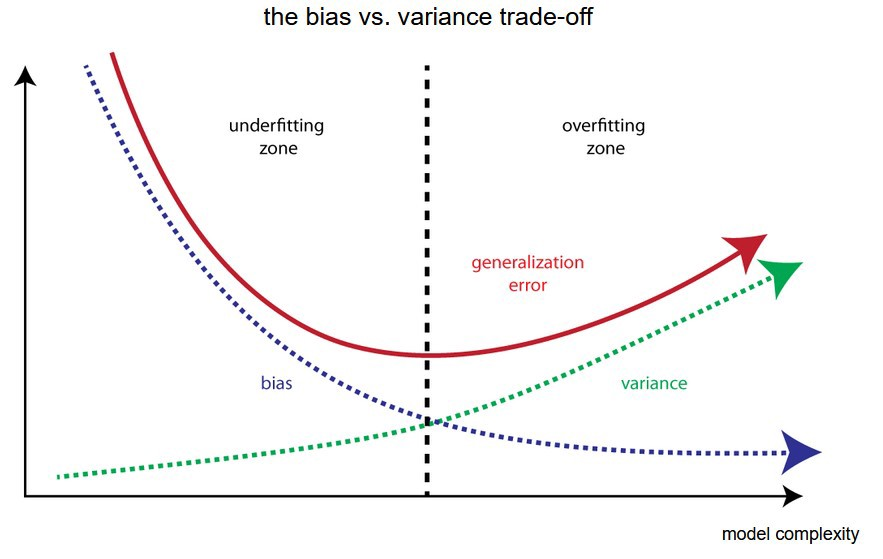

# 7. Total Error


> ## **Total Error = Bias^2 + Variance+ Irreductable Error**


To build a good model, we need to find a good balance between bias and variance such that it minimizes the total error.

An optimal balance of bias and variance would never overfit or underfit the model.

Therefore understanding bias and variance is critical for understanding the behavior of prediction models.

*from* [*Seema Singh*](https://medium.com/@seema.singh)

# 8. Notebook Setup

## 8.1. Loading Modules

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
from scipy import stats
import random
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
from sklearn.metrics import mean_squared_error

## 8.2. Configuration

In [3]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

# 9. Diving Deep into Code Examples - Generating Data

## 9.1. Lets Generate some data

In [4]:
rows = 1000
random_x = np.random.randn(rows)

random_y = (((random_x ** 5)) + (-2 * (random_x ** 4))  -4.2 * (random_x**3) +20 * (random_x**2)+ 6 ** random_x +2).reshape(rows, 1)

test_df=pd.read_csv("../input/digit-recognizer/test.csv")

In [5]:
random_y.mean()

24.231324829075987

#### Adding noise

In [6]:
mylist = []

for i in range(0,320):
    x = random.randint(25,100)
    mylist.append(x)

In [7]:
random_y[0:20] = random_y[0:20] - 100
random_y[100:140] = random_y[100:140] - 30
random_y[900:920] = random_y[900:920] - 20
random_y[200:520] = random_y[200:520] + np.array(mylist).reshape(320, 1)
random_y[500:520] = random_y[500:520] - 50
random_y[600:640] = random_y[600:640] - 25

## 9.2. Visualizing Distributions of X,y

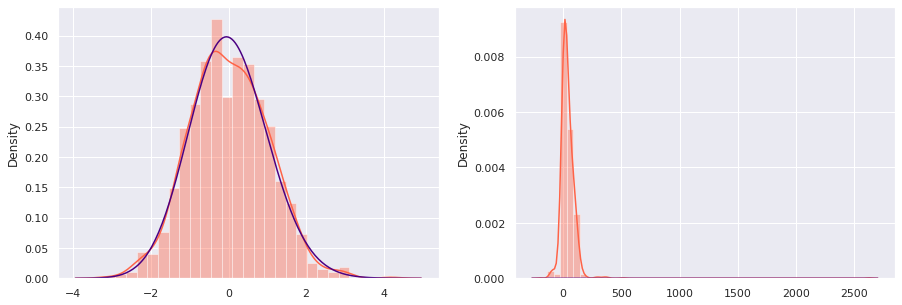

In [8]:
sns.set(rc={'figure.figsize':(15,5)})
for i, column in enumerate([random_x,random_y], 1):
    plt.subplot(1,2,i)
    sns.distplot(column,color='tomato',fit_kws={"color":"indigo"},fit=stats.gamma, label="label 1")

## 9.3. Train Test, Holdout sets

In [9]:
# Hold out 20% of the dataset for training
test_size = int(np.round(rows * 0.2, 0))
# Split dataset into training and testing sets
x_train = random_x[:-test_size]
y_train = random_y[:-test_size]
x_test = random_x[-test_size:]
y_test = random_y[-test_size:]

## 9.3. Plot the training set data

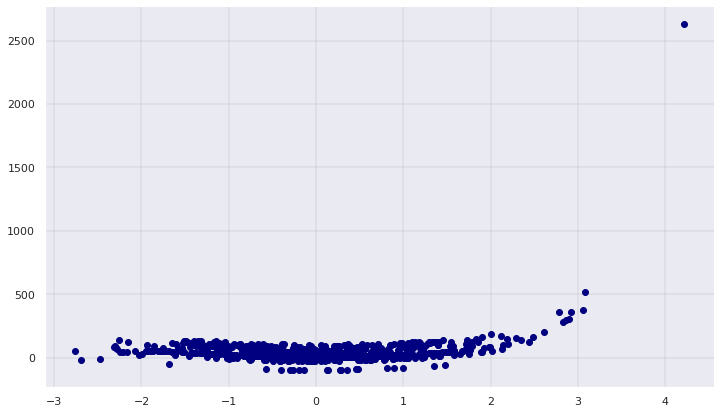

In [10]:
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
ax.scatter(x_train, y_train, color="navy")
plt.show()

# 10. Plotting with Simple Regression

## 10.1 Developing model

In [11]:
linear_regression_model = np.polyfit(x_train, y_train, deg=1)
linear_model_predictions = np.polyval(linear_regression_model, x_test)
linear_model_predictions_train =  np.polyval(linear_regression_model, x_train)

## 10.2. Plotting simple liner regression

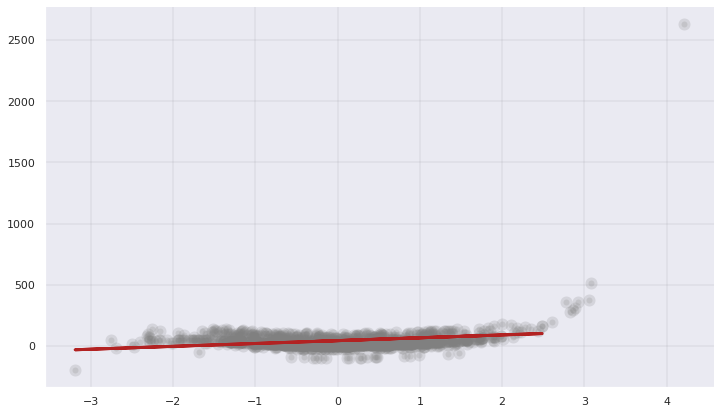

In [12]:
# Plot linear regression line
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.7)
main=ax.scatter(random_x, random_y, color='grey',alpha=0.2,linewidth=6)
plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=3)
plt.show()

- It clearly underfits.

# 11. Functions to calculate

## 11.1. Calculate Bias

In [13]:
def get_bias(predicted_values, true_values):
    return np.round(np.mean((predicted_values - true_values) ** 2), 0)

## 11.2. Calculate Variance

In [14]:
def get_variance(values):
    return np.round(np.var(values), 0)

## 11.3. Calculate Other Metrics

In [15]:
def get_metrics(target_train, target_test, model_train_predictions, model_test_predictions):
    training_mse = mean_squared_error(target_train, model_train_predictions)
    test_mse = mean_squared_error(target_test, model_test_predictions)
    bias = get_bias(model_test_predictions, target_test)
    variance = get_variance(model_test_predictions)
    linear_regression_model = np.polyfit(x_train, y_train, deg=1)
    
    return [training_mse,test_mse,bias,variance]

In [16]:
degree=[]
training_mse=[]
test_mse=[]
bias=[]
variance=[]

## 11.4. Checking Metrics

In [17]:
# Predicting values for the test set
linear_model_predictions = np.polyval(linear_regression_model, x_test)
    
# Predicting values for the training set
training_linear_model_predictions = np.polyval(linear_regression_model, x_train)
    
linear_training_mse, linear_test_mse, linear_bias, linear_variance = get_metrics(y_train, y_test,training_linear_model_predictions, linear_model_predictions)

degree.append(1)
training_mse.append(linear_training_mse)
test_mse.append(linear_test_mse)
bias.append(linear_bias)
variance.append(linear_variance)


print('Simple linear model')
print('- Training MSE %0.f' % linear_training_mse)
print('- Test MSE %0.f' % linear_test_mse)
print('- Bias %0.f' % linear_bias)
print('- Variance %0.f' % linear_variance)

Simple linear model
- Training MSE 10805
- Test MSE 1493
- Bias 1845
- Variance 567


# 12. Testing with 2nd Degree Polynomial

## 12.1. Making Predictions

In [18]:
#deg=2 for 2nd degree
polynomial_2nd_model = np.polyfit(x_train, y_train, deg=2)
p_2nd = np.poly1d(polynomial_2nd_model.reshape(1, 3)[0])
print('Coefficients %s\n' % p_2nd)

Coefficients        2
41.81 x + 11.89 x + 2.122



In [19]:
polynomial_2nd_predictions = np.polyval(polynomial_2nd_model, x_test)
# Predicting values for the training set
training_polynomial_2nd_predictions = np.polyval(polynomial_2nd_model, x_train)

## 12.2. Testing metrics

In [20]:
polynomial_2nd_training_mse, polynomial_2nd_test_mse, polynomial_2nd_bias, polynomial_2nd_variance = get_metrics(y_train, y_test, training_polynomial_2nd_predictions, polynomial_2nd_predictions)

degree.append(2)
training_mse.append(polynomial_2nd_training_mse)
test_mse.append(polynomial_2nd_test_mse)
bias.append(polynomial_2nd_bias)
variance.append(polynomial_2nd_variance)

print('2nd degree polynomial')
print('Training MSE %0.f' % polynomial_2nd_training_mse)
print('Test MSE %0.f' % polynomial_2nd_test_mse)
print('Bias %0.f' % polynomial_2nd_bias)
print('Variance %0.f' % polynomial_2nd_variance)

2nd degree polynomial
Training MSE 7034
Test MSE 3654
Bias 4838
Variance 3395


## 12.3. Ploting

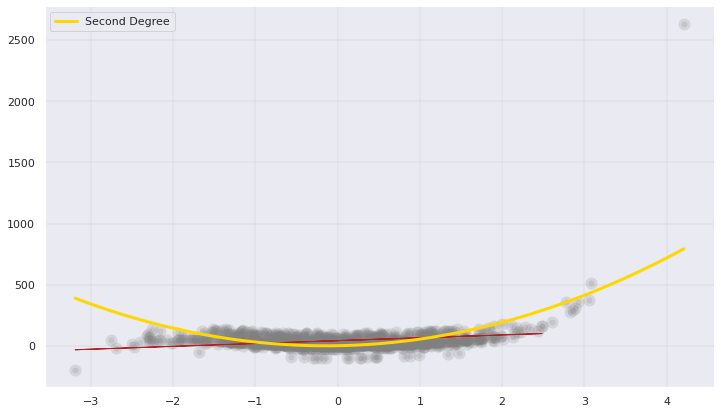

In [21]:
# Plot 2nd degree polynomial
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
x_linspace = np.linspace(min(random_x), max(random_x), num=len(polynomial_2nd_predictions))
main=ax.scatter(random_x, random_y, color='grey',alpha=0.2,linewidth=6)
first=plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=1)
second=plt.plot(x_linspace, p_2nd(x_linspace), '-', color='gold', linewidth=3)

plt.legend([first[:1],second[:1]], ['First Degree'])
plt.legend(second[:1], ['Second Degree']);

- It still underfits.

# 13. Testing with 4th Degree Polynomial

## 13.1. Making Predictions

In [22]:
#deg=4 for 4th degree
polynomial_4thdeg_model = np.polyfit(x_train, y_train, deg=4)
p_4th = np.poly1d(polynomial_4thdeg_model.reshape(1, 5)[0])
print('Coefficients %s\n' % p_4th)

Coefficients        4       3         2
6.588 x + 7.1 x - 15.66 x - 16.48 x + 37.11



In [23]:
polynomial_4thdeg_predictions = np.polyval(polynomial_4thdeg_model, x_test)
# Predicting values for the training set
training_polynomial_4thdeg_predictions = np.polyval(polynomial_4thdeg_model, x_train)

## 13.2. Testing metrics

In [24]:
polynomial_4thdeg_training_mse, polynomial_4thdeg_test_mse, polynomial_4thdeg_bias, polynomial_4thdeg_variance = get_metrics(y_train, y_test, training_polynomial_4thdeg_predictions, polynomial_4thdeg_predictions)

degree.append(4)
training_mse.append(polynomial_4thdeg_training_mse)
test_mse.append(polynomial_4thdeg_test_mse)
bias.append(polynomial_4thdeg_bias)
variance.append(polynomial_4thdeg_variance)

print('4th degree polynomial')
print('Training MSE %0.f' % polynomial_4thdeg_training_mse)
print('Test MSE %0.f' % polynomial_4thdeg_test_mse)
print('Bias %0.f' % polynomial_4thdeg_bias)
print('Variance %0.f' % polynomial_4thdeg_variance)

4th degree polynomial
Training MSE 2452
Test MSE 2453
Bias 2313
Variance 1115


## 13.3. Ploting

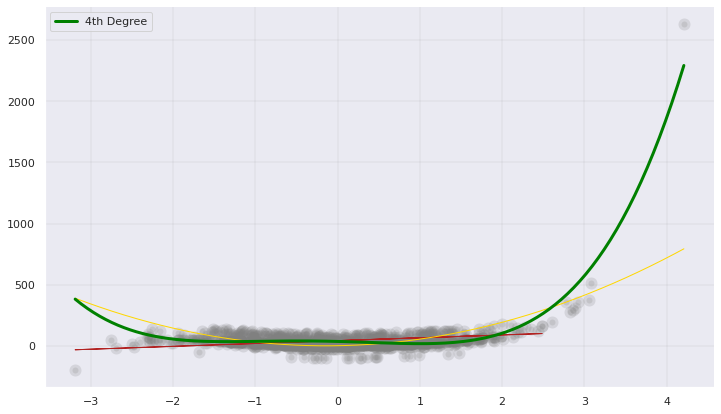

In [25]:
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
x_linspace = np.linspace(min(random_x), max(random_x), num=len(polynomial_2nd_predictions))
main=ax.scatter(random_x, random_y, color='grey',alpha=0.2,linewidth=6)
first=plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=1)
second=plt.plot(x_linspace, p_2nd(x_linspace), '-', color='gold', linewidth=1)
fourth=plt.plot(x_linspace, p_4th(x_linspace), '-', color='green', linewidth=3)

plt.legend(fourth[:1], ['4th Degree']);

- A fair fit now.

# 14. Testing with 5th Degree Polynomial (Original)

## 14.1. Making Predictions

In [26]:
polynomial_5thdeg_model = np.polyfit(x_train, y_train, deg=5)
p_5th = np.poly1d(polynomial_5thdeg_model.reshape(1, 6)[0])
polynomial_5thdeg_predictions = np.polyval(polynomial_5thdeg_model, x_test)
training_polynomial_5thdeg_predictions = np.polyval(polynomial_5thdeg_model, x_train)

## 14.2. Testing metrics

In [27]:
polynomial_5thdeg_training_mse, polynomial_5thdeg_test_mse, polynomial_5thdeg_bias, polynomial_5thdeg_variance = get_metrics(y_train, y_test, training_polynomial_5thdeg_predictions, polynomial_5thdeg_predictions)

degree.append(5)
training_mse.append(polynomial_5thdeg_training_mse)
test_mse.append(polynomial_5thdeg_test_mse)
bias.append(polynomial_5thdeg_bias)
variance.append(polynomial_5thdeg_variance)

print('5th degree polynomial')
print('Training MSE %0.f' % polynomial_5thdeg_training_mse)
print('Test MSE %0.f' % polynomial_5thdeg_test_mse)
print('Bias %0.f' % polynomial_5thdeg_bias)
print('Variance %0.f' % polynomial_5thdeg_variance)

5th degree polynomial
Training MSE 1697
Test MSE 666
Bias 2394
Variance 1325


## 14.3. Ploting

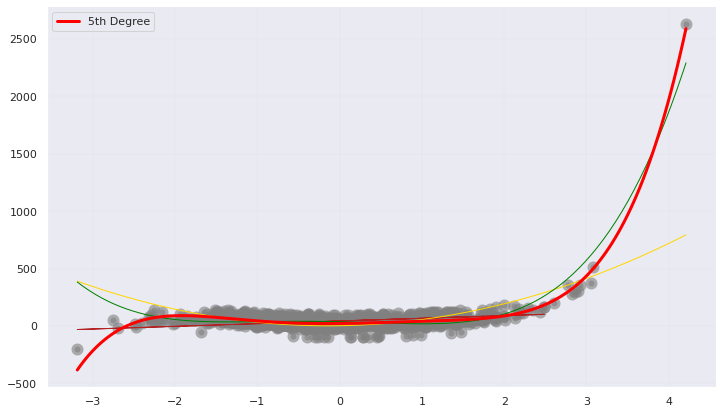

In [28]:
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.1)
x_linspace = np.linspace(min(random_x), max(random_x), num=len(polynomial_2nd_predictions))
main=ax.scatter(random_x, random_y, color='grey',alpha=0.6,linewidth=6)
first=plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=1)
second=plt.plot(x_linspace, p_2nd(x_linspace), '-', color='gold', linewidth=1)
fourth=plt.plot(x_linspace, p_4th(x_linspace), '-', color='green', linewidth=1)
fifth=plt.plot(x_linspace, p_5th(x_linspace), '-', color='red', linewidth=3)

plt.legend(fifth[:1], ['5th Degree']);

- A proper fit now.

# 15. Testing with 8th Degree Polynomial (Overfit)

## 15.1. Making Predictions

In [29]:
polynomial_8thdeg_model = np.polyfit(x_train, y_train, deg=8)
p_8th = np.poly1d(polynomial_5thdeg_model.reshape(1, 6)[0])
polynomial_8thdeg_predictions = np.polyval(polynomial_8thdeg_model, x_test)
training_polynomial_8thdeg_predictions = np.polyval(polynomial_8thdeg_model, x_train)

In [30]:
polynomial_80thdeg_model = np.polyfit(x_train, y_train, deg=20)
p_80th = np.poly1d(polynomial_80thdeg_model.reshape(1, 21)[0])
polynomial_80thdeg_predictions = np.polyval(polynomial_80thdeg_model, x_test)
training_polynomial_80thdeg_predictions = np.polyval(polynomial_80thdeg_model, x_train)

## 15.2. Testing metrics

In [31]:
polynomial_8thdeg_training_mse, polynomial_8thdeg_test_mse, polynomial_8thdeg_bias, polynomial_8thdeg_variance = get_metrics(y_train, y_test, training_polynomial_8thdeg_predictions, polynomial_8thdeg_predictions)

degree.append(8)
training_mse.append(polynomial_8thdeg_training_mse)
test_mse.append(polynomial_8thdeg_test_mse)
bias.append(polynomial_8thdeg_bias)
variance.append(polynomial_8thdeg_variance)

print('8th degree polynomial')
print('Training MSE %0.f' % polynomial_8thdeg_training_mse)
print('Test MSE %0.f' % polynomial_8thdeg_test_mse)
print('Bias %0.f' % polynomial_8thdeg_bias)
print('Variance %0.f' % polynomial_8thdeg_variance)

8th degree polynomial
Training MSE 1637
Test MSE 901
Bias 1678
Variance 490


In [32]:
polynomial_80thdeg_training_mse, polynomial_80thdeg_test_mse, polynomial_80thdeg_bias, polynomial_80thdeg_variance = get_metrics(y_train, y_test, training_polynomial_80thdeg_predictions, polynomial_80thdeg_predictions)

degree.append(20)
training_mse.append(polynomial_80thdeg_training_mse)
test_mse.append(polynomial_80thdeg_test_mse)
bias.append(polynomial_80thdeg_bias)
variance.append(polynomial_80thdeg_variance)

print('80th degree polynomial')
print('Training MSE %0.f' % polynomial_80thdeg_training_mse)
print('Test MSE %0.f' % polynomial_80thdeg_test_mse)
print('Bias %0.f' % polynomial_80thdeg_bias)
print('Variance %0.f' % polynomial_80thdeg_variance)

80th degree polynomial
Training MSE 1595
Test MSE 4824699
Bias 4892513
Variance 4873822


## 15.3. Ploting

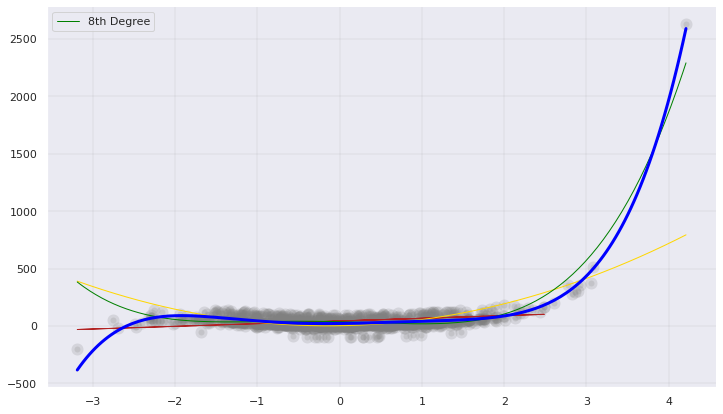

In [33]:
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
x_linspace = np.linspace(min(random_x), max(random_x), num=len(polynomial_2nd_predictions))
main=ax.scatter(random_x, random_y, color='grey',alpha=0.2,linewidth=6)
first=plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=1)
second=plt.plot(x_linspace, p_2nd(x_linspace), '-', color='gold', linewidth=1)
fourth=plt.plot(x_linspace, p_4th(x_linspace), '-', color='green', linewidth=1)
fifth=plt.plot(x_linspace, p_5th(x_linspace), '-', color='red', linewidth=1)
eighth=plt.plot(x_linspace, p_8th(x_linspace), '-', color='blue', linewidth=3)

plt.legend(fourth[:1], ['8th Degree']);

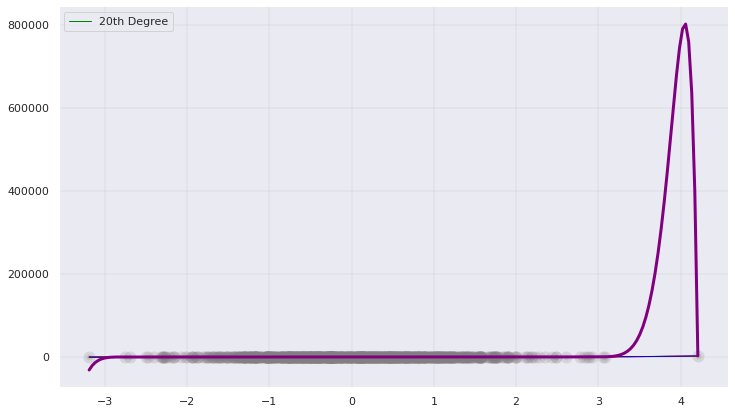

In [34]:
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
x_linspace = np.linspace(min(random_x), max(random_x), num=len(polynomial_2nd_predictions))
main=ax.scatter(random_x, random_y, color='grey',alpha=0.2,linewidth=6)
first=plt.plot(x_test, linear_model_predictions, color='firebrick', linewidth=1)
second=plt.plot(x_linspace, p_2nd(x_linspace), '-', color='gold', linewidth=1)
fourth=plt.plot(x_linspace, p_4th(x_linspace), '-', color='green', linewidth=1)
fifth=plt.plot(x_linspace, p_5th(x_linspace), '-', color='red', linewidth=1)
eighth=plt.plot(x_linspace, p_8th(x_linspace), '-', color='blue', linewidth=1)
eighthy=plt.plot(x_linspace, p_80th(x_linspace), '-', color='purple', linewidth=3)

plt.legend(fourth[:1], ['20th Degree']);

- started to overfit.

# 16. Ploting Metrics

In [35]:
lst = [degree,training_mse,test_mse,bias,variance]
metrics_df = pd.DataFrame(lst)
metrics_df=metrics_df.T
metrics_df.rename(columns = {0:"degree",1:"training_mse",2:"test_mse",3:"bias",4:"variance"}, inplace = True)
metrics_df

,degree,training_mse,test_mse,bias,variance
0,1.0,10805.418716,1.493091e+03,1845.0,567.0
1,2.0,7033.912422,3.653774e+03,4838.0,3395.0
2,4.0,2451.567575,2.452718e+03,2313.0,1115.0
3,5.0,1696.843122,6.657324e+02,2394.0,1325.0
4,8.0,1636.671594,9.005211e+02,1678.0,490.0
5,20.0,1595.077852,4.824699e+06,4892513.0,4873822.0


In [36]:
metrics_df.describe()

,degree,training_mse,test_mse,bias,variance
count,6.000000,6.000000,6.000000e+00,6.000000e+00,6.000000e+00
mean,6.666667,4203.248547,8.056441e+05,8.175968e+05,8.134523e+05
std,6.976150,3855.946964,1.968927e+06,1.996293e+06,1.989167e+06
min,1.000000,1595.077852,6.657324e+02,1.678000e+03,4.900000e+02
25%,2.500000,1651.714476,1.048664e+03,1.962000e+03,7.040000e+02
50%,4.500000,2074.205348,1.972905e+03,2.353500e+03,1.220000e+03
75%,7.250000,5888.326210,3.353510e+03,4.227000e+03,2.877500e+03
max,20.000000,10805.418716,4.824699e+06,4.892513e+06,4.873822e+06


## 16.1. Plotting MSEs

In [37]:
plt.figure(figsize=(10,10))
trace1 = go.Scatter(x=metrics_df.degree,
                    y=metrics_df.training_mse,
                    name = "Training",
                    line = dict(color = 'green'),
                    opacity = 0.9,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=5
                        )))

trace2 = go.Scatter(x=metrics_df.degree,
                    y=metrics_df.test_mse,
                    name = "Test",
                    line = dict(color = 'red'),
                    opacity = 0.9,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=5
                        )))

layout2 = dict(title='Mean Squared Error',)

fig2 = dict(data=[trace1, trace2], layout=layout2)

iplot(fig2)

<Figure size 720x720 with 0 Axes>

## 16.2. Potting Bias

In [38]:
plt.figure(figsize=(10,10))
Bias = go.Scatter(x=metrics_df.degree,
                    y=metrics_df.bias,
                    name = "Bias",
                    line = dict(color = 'darkorange'),
                    opacity = 1,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=12
                        )))

layout2 = dict(title='Bias',)

fig = dict(data=[Bias], layout=layout2)

iplot(fig)

<Figure size 720x720 with 0 Axes>

## 16.2. Potting Variance

In [39]:
plt.figure(figsize=(10,10))
Variance = go.Scatter(x=metrics_df.degree,
                    y=metrics_df.variance,
                    name = "Variance",
                    line = dict(color = 'indigo'),
                    opacity = 1,
                    marker=dict(
                        color='white',
                        size=10,
                        line=dict(
                            width=12
                        )))

layout2 = dict(title='Variance',)

fig = dict(data=[Variance], layout=layout2)

iplot(fig)

<Figure size 720x720 with 0 Axes>

## 16.2. Potting Bias - Variance

In [40]:
layout = dict(title='Bias - Variance',)
fig = dict(data=[Bias, Variance], layout=layout)
iplot(fig)

# 17. Reference
- [Gentle Introduction to the Bias-Variance Trade-Off in Machine Learning](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/#:~:text=Bias%20is%20the%20simplifying%20assumptions,the%20bias%20and%20the%20variance)
- [Bias-Variance tradeoff in Machine Learning models](https://towardsdatascience.com/bias-variance-tradeoff-in-machine-learning-models-a-practical-example-cf02fb95b15d)
- [Understanding the Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)
- [What Bias-Variance Bulls-Eye Diagram Really Represents](https://towardsdatascience.com/what-bias-variance-bulls-eye-diagram-really-represent-ff6fb9670993)
- [What Is the Difference Between Bias and Variance?](https://www.mastersindatascience.org/learning/difference-between-bias-and-variance/)

# 18. Cheatsheets
[![BVT-CS.png](https://i.postimg.cc/6pmyHhCr/BVT-CS.png)](https://postimg.cc/5X84yL7y)

# Learn, Share, Support